In [1]:
# Adding src module to path
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# general imports
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.nqs import RBM, Hamiltonian

In [14]:
#Initializing starting values
hamiltonian = np.array([1, 0, 0, -1])
visible_size = int(np.sqrt(len(hamiltonian)))
hidden = 4
steps = 1000

seed = 342

#Finding true ground state energy and displaying it
np.random.seed(seed)

energy_list = []
error_list = []
gstate_list =[]

In [15]:
H = Hamiltonian(values=hamiltonian)

rbm = RBM(visible_size=visible_size, hidden_size=hidden, hamiltonian=H, walker_steps=0)

eig, states = np.linalg.eigh(H)
print(f"Eig: {eig},\nstates: \n{states}")
E_truth = np.min(eig)
e_truth_index = np.where(eig == E_truth)
print(f"Eig index: {e_truth_index}")
gstate = state[e_truth_index]
print(f"g state: {gstate}")

energy_list = rbm.train(iterations=steps, lr=0.01, print_energy=False)


Eig: [-1.  0.  0.  1.],
states: 
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
Eig index: (array([0], dtype=int64),)
g state: [[0. 0. 0. 1.]]
func:train args:[(<src.nqs.RBM object at 0x00000170D39F3370>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 0.5449471473693848 sec


<IPython.core.display.Javascript object>


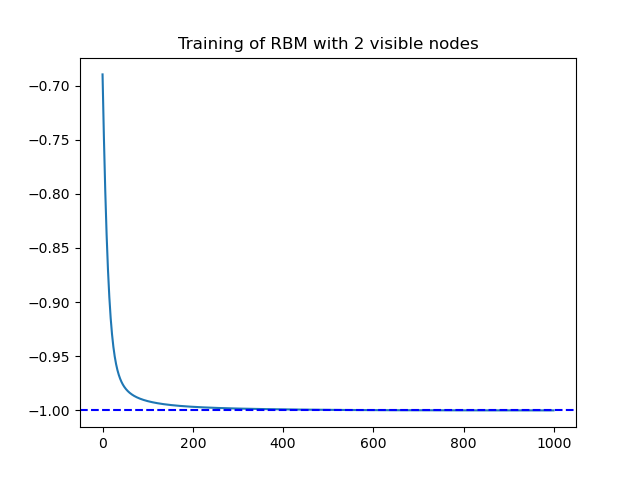

Text(0.5, 1.0, 'Training of RBM with 2 visible nodes')

In [16]:
# plt.ioff() # uncomment to stop plotting in notebook

plt.plot(energy_list)

plt.axhline(y=E_truth, color='b', linestyle='--')
plt.title(f"Training of RBM with {visible_size} visible nodes")


In [17]:
print(f"Ground state energy found: {energy_list[-1]}")
print(f"Accuracy: {np.abs(E_truth-energy_list[-1])}")

Ground state energy found: -0.99995868238411
Accuracy: 4.131761588999083e-05


In [20]:
print(f"RBM wave function: \n{rbm.wave_function()}")
print(f"True ground state: \n{gstate}")

print(f"RBM state error: {np.abs(gstate)**2 @ np.abs(rbm.wave_function())**2}")

RBM wave function: 
[[6.80965067e-06+2.40911192e-05j]
 [2.62344808e-03+5.22153254e-03j]
 [1.72597977e-03-2.04706482e-03j]
 [6.27802934e-01-7.78345783e-01j]]
True ground state: 
[[0. 0. 0. 1.]]
RBM state error: [[0.99995868]]
